In [1]:
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# 1. Change of the stocks price overtime

In [45]:
# List of stocks 
stock_list = ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Getting the data of yahoo finances
for stock in stock_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
companies_list = [FB, AAPL, AMZN, NFLX, GOOG, TSLA]

companies_names = ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG', 'TSLA']

for company, company_name in zip(companies_list, companies_names):
    company["companies_names"] = company_name
    
df = pd.concat(companies_list, axis = 0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,companies_names
Date,,,,,,,
2022-01-31,937.989990,862.049988,872.710022,936.719971,34812000.0,936.719971,TSLA
2022-02-01,943.700012,905.000000,935.210022,931.250000,24379400.0,931.250000,TSLA
2022-02-02,931.500000,889.409973,928.179993,905.659973,22264300.0,905.659973,TSLA
2022-02-03,937.000000,880.520020,882.000000,891.140015,26285200.0,891.140015,TSLA
2022-02-04,936.500000,881.169983,897.219971,923.320007,24472600.0,923.320007,TSLA
2022-02-07,947.770020,902.710022,923.789978,907.340027,20331500.0,907.340027,TSLA
2022-02-08,926.289978,894.799988,905.530029,922.000000,16909700.0,922.000000,TSLA
2022-02-09,946.270020,920.000000,935.000000,932.000000,17419800.0,932.000000,TSLA
2022-02-10,943.809998,896.700012,908.369995,904.549988,22042300.0,904.549988,TSLA


In [4]:
TSLA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,814.620910,778.402819,797.603730,796.736070,2.704625e+07,796.736070
std,181.657190,168.773849,175.757371,175.282015,1.140822e+07,175.282015
min,566.210022,539.489990,552.549988,563.000000,9.800600e+06,563.000000
25%,683.922501,651.927505,669.937500,668.027496,1.894995e+07,668.027496
50%,740.679993,712.069977,724.930023,730.539978,2.478520e+07,730.539978
75%,946.645020,903.657516,929.474991,931.437500,3.224438e+07,931.437500
max,1243.489990,1217.000000,1234.410034,1229.910034,8.939650e+07,1229.910034


In [5]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-02-16 to 2022-02-11
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   High             252 non-null    float64
 1   Low              252 non-null    float64
 2   Open             252 non-null    float64
 3   Close            252 non-null    float64
 4   Volume           252 non-null    int64  
 5   Adj Close        252 non-null    float64
 6   companies_names  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## 1.1 Historical of closing price

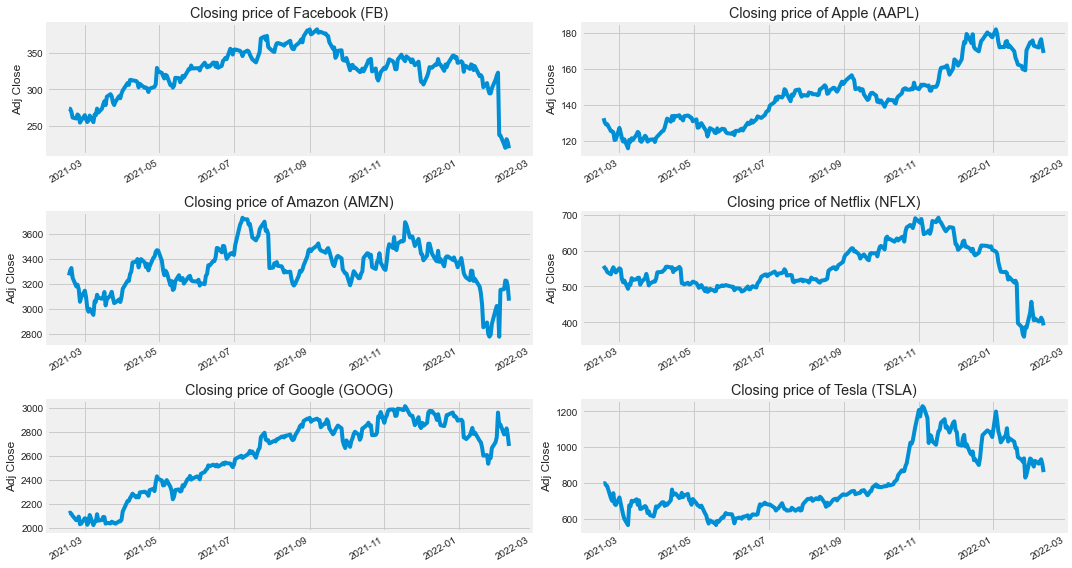

In [6]:
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=2.25, bottom=2.24)

tech_company = ['Facebook', 'Apple', 'Amazon', 'Netflix', 'Google', 'Tesla']

for i, company in enumerate(companies_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot(color='#008FD5')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing price of {tech_company[i - 1]} ({stock_list[i - 1]})")
    
plt.tight_layout()

## 1.2 Volume of stock daily

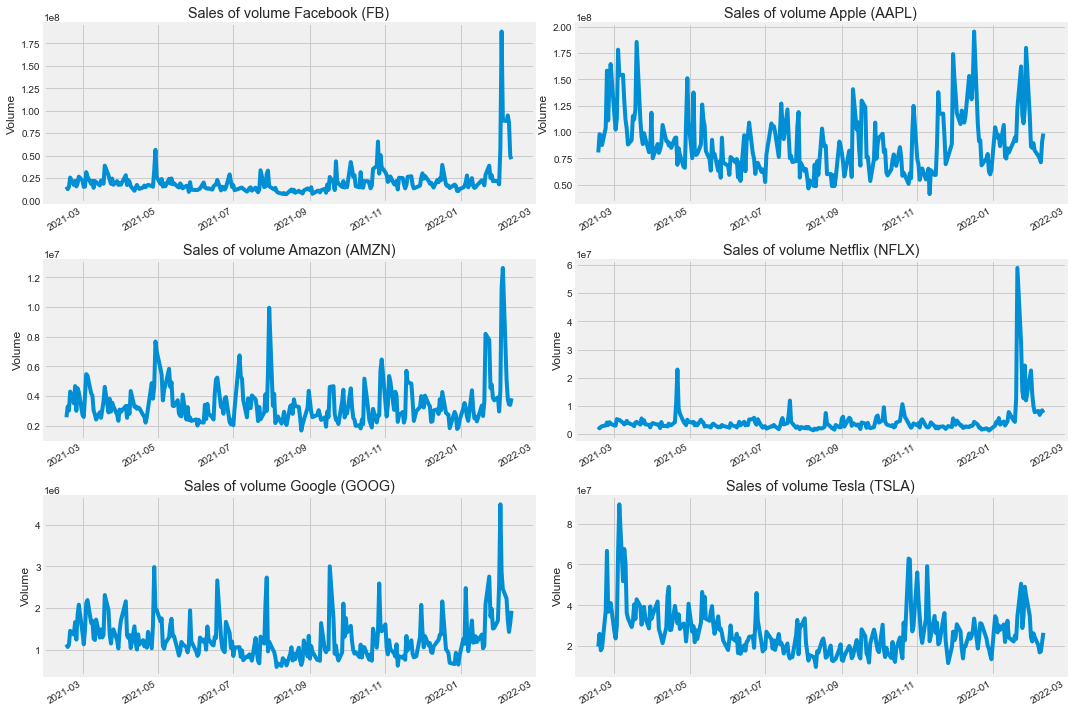

In [7]:
# Volume of the stock each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=2.25, bottom=2.24)

for i, company in enumerate(companies_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot(color='#008FD5')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales of volume {tech_company[i - 1]} ({stock_list[i - 1]})")
    
plt.tight_layout()

# 2. Moving average of stocks

In [53]:
moving_average_day = [10, 20, 50]

for ma_day in moving_average_day:
    
    for company in companies_list:
        column_name = f"MA for {ma_day} days"
        company[column_name] = company['Adj Close'].rolling(ma_day).mean()

In [58]:
display(company.tail(5))

,High,Low,Open,Close,Volume,Adj Close,companies_names,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2022-02-07,947.770020,902.710022,923.789978,907.340027,20331500,907.340027,TSLA,902.668994,961.646503,1010.826595,-0.017307
2022-02-08,926.289978,894.799988,905.530029,922.000000,16909700,922.000000,TSLA,903.028992,954.840503,1007.628195,0.016157
2022-02-09,946.270020,920.000000,935.000000,932.000000,17419800,932.000000,TSLA,902.487994,948.220502,1003.528395,0.010846
2022-02-10,943.809998,896.700012,908.369995,904.549988,22042300,904.549988,TSLA,910.032996,938.137003,998.724194,-0.029453
2022-02-11,915.960022,850.700012,909.630005,860.000000,26492700,860.000000,TSLA,911.397998,929.559000,994.024194,-0.049251


In [9]:
GOOG.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'companies_names', 'MA for 10 days', 'MA for 20 days',
       'MA for 50 days'],
      dtype='object')

In [10]:
FB.iloc[:, [5, 7, 8, 9]]

,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,
2021-02-16,273.970001,NaN,NaN,NaN
2021-02-17,273.570007,NaN,NaN,NaN
2021-02-18,269.390015,NaN,NaN,NaN
2021-02-19,261.559998,NaN,NaN,NaN
2021-02-22,260.329987,NaN,NaN,NaN
...,...,...,...,...
2022-02-07,224.910004,284.615001,303.320501,320.082401
2022-02-08,220.179993,276.618001,297.926000,317.823601
2022-02-09,232.000000,270.355000,292.807500,315.703001


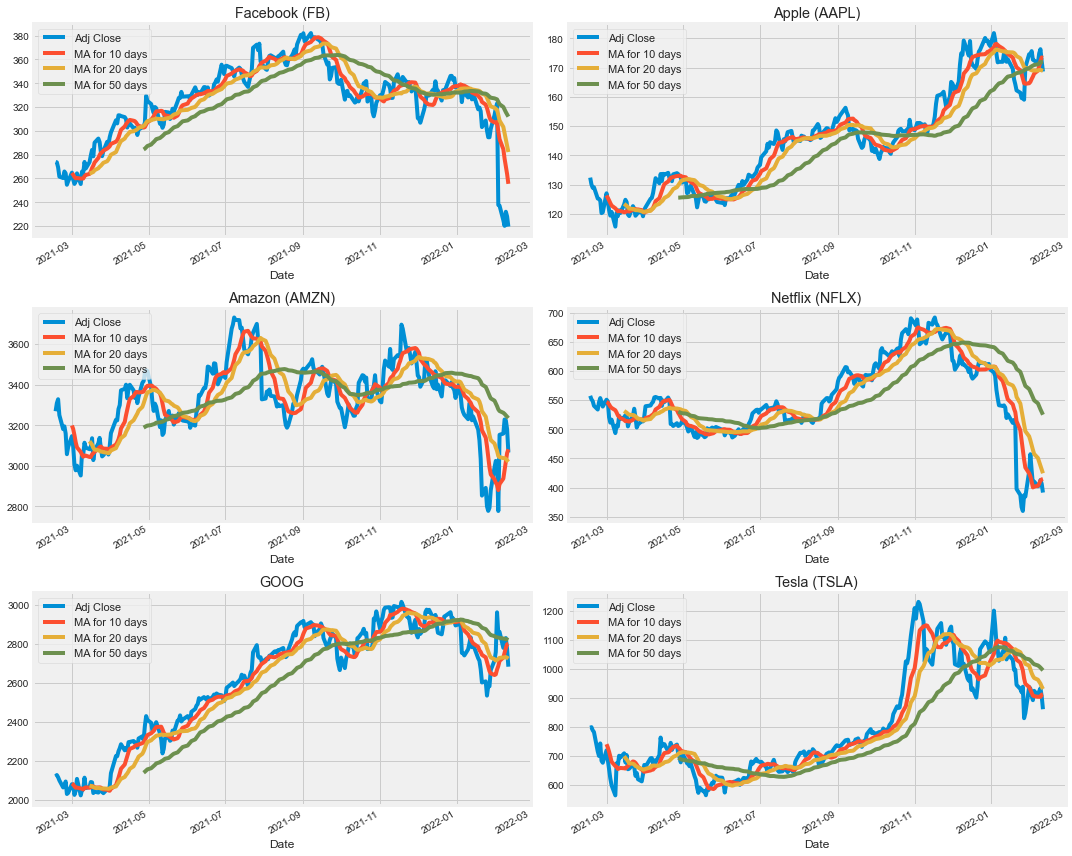

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)
  
    
FB.iloc[:, [5, 7, 8, 9]].plot(ax=axes[0,0])
axes[0, 0].legend(loc='upper left',fontsize = 11)
axes[0, 0].set_title('Facebook (FB)')


AAPL.iloc[:, [5, 7, 8, 9]].plot(ax=axes[0,1])
axes[0, 1].legend(loc='upper left',fontsize = 11)
axes[0, 1].set_title('Apple (AAPL)')


AMZN.iloc[:, [5, 7, 8, 9]].plot(ax=axes[1,0])
axes[1, 0].legend(loc='upper left',fontsize = 11)
axes[1, 0].set_title('Amazon (AMZN)')
 
    
NFLX.iloc[:, [5, 7, 8, 9]].plot(ax=axes[1,1])
axes[1, 1].legend(loc='upper left',fontsize = 11)
axes[1, 1].set_title('Netflix (NFLX)')

 
GOOG.iloc[:, [5, 7, 8, 9]].plot(ax=axes[2,0])
axes[2, 0].legend(loc='upper left',fontsize = 11)
axes[2, 0].set_title('GOOG')

  
TSLA.iloc[:, [5, 7, 8, 9]].plot(ax=axes[2,1])
axes[2, 1].legend(loc='upper left',fontsize = 11)
axes[2, 1].set_title('Tesla (TSLA)')


plt.tight_layout()

# 3. Daily return of stock average

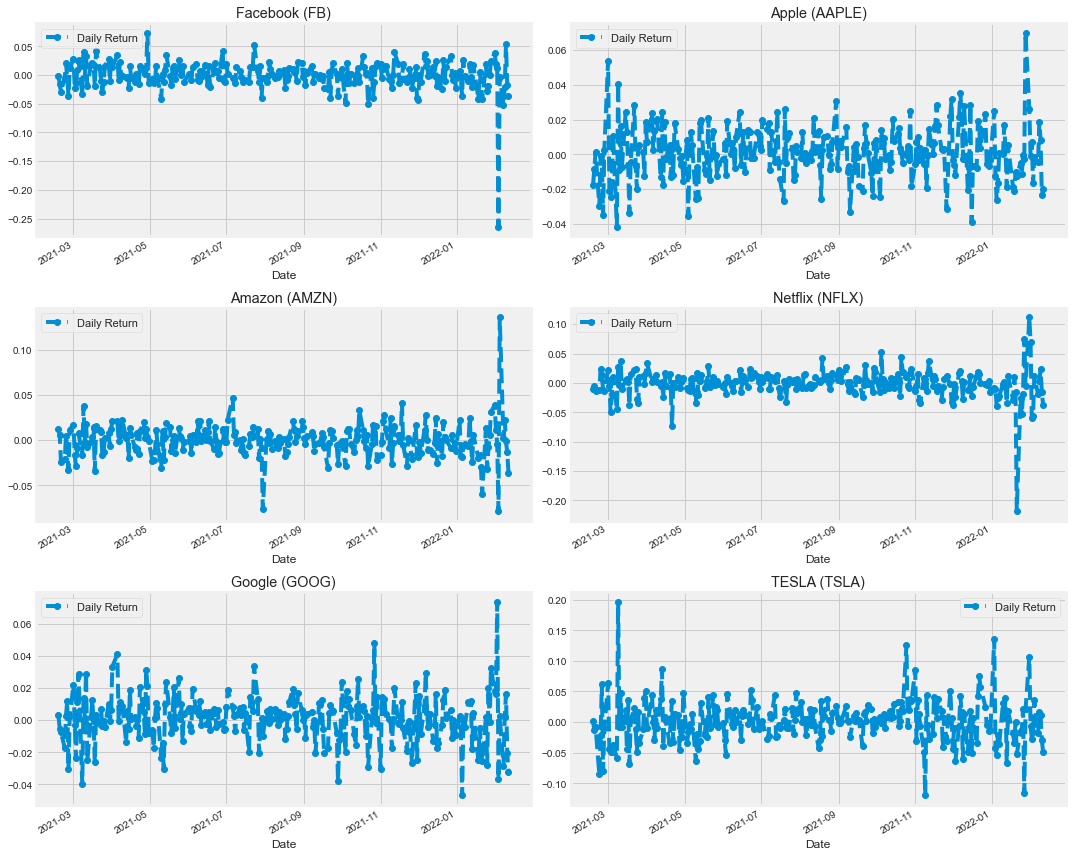

In [12]:
for company in companies_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)


# FB.iloc[:, 10]
FB['Daily Return'].plot(ax=axes[0,0], legend = True, linestyle = '--', marker = 'o', color='#008FD5')
axes[0, 0].legend(fontsize = 11)
axes[0, 0].set_title('Facebook (FB)')


AAPL['Daily Return'].plot(ax=axes[0,1], legend = True, linestyle = '--', marker = 'o', color='#008FD5')
axes[0, 1].legend(fontsize = 11)
axes[0, 1].set_title('Apple (AAPLE)')


AMZN['Daily Return'].plot(ax=axes[1,0], legend = True, linestyle = '--', marker = 'o', color='#008FD5')
axes[1, 0].legend(fontsize = 11)
axes[1, 0].set_title('Amazon (AMZN)')

 
NFLX['Daily Return'].plot(ax=axes[1,1], legend = True, linestyle = '--', marker = 'o', color='#008FD5')
axes[1, 1].legend(fontsize = 11)
axes[1, 1].set_title('Netflix (NFLX)')


GOOG['Daily Return'].plot(ax=axes[2,0], legend = True, linestyle = '--', marker = 'o', color='#008FD5')
axes[2, 0].legend(fontsize = 11)
axes[2, 0].set_title('Google (GOOG)')


TSLA['Daily Return'].plot(ax=axes[2,1], legend = True, linestyle = '--', marker = 'o', color='#008FD5')
axes[2, 1].legend(fontsize = 11)
axes[2, 1].set_title('TESLA (TSLA)')


plt.tight_layout()

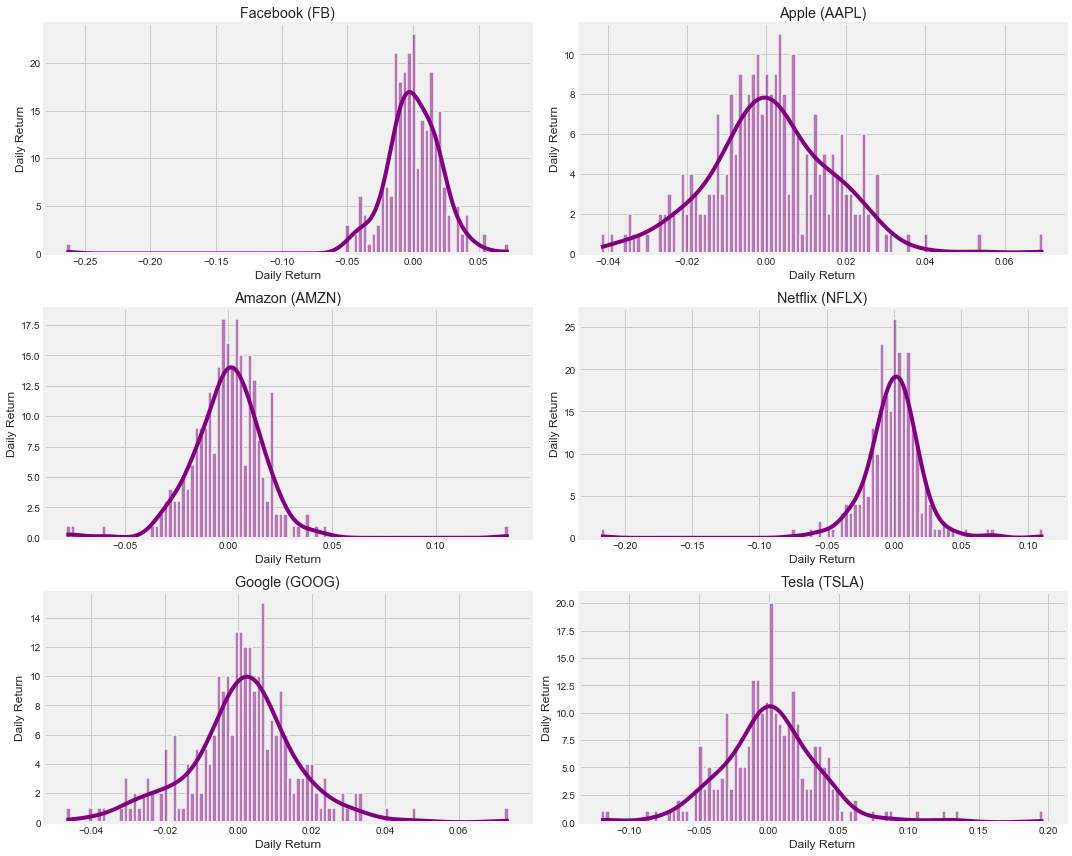

In [13]:
plt.figure(figsize=(15, 12))

for i, company in enumerate(companies_list, 1):
    plt.subplot(3, 2, i)
    sns.histplot(company['Daily Return'].dropna(), bins=100, color='purple', kde=True, linewidth=1.5)
    plt.ylabel('Daily Return')
    plt.title(f'{tech_company[i - 1]} ({stock_list[i - 1]})')
    
plt.tight_layout()

# 4. Correlation between different stocks closing prices 

In [14]:
closing_price = DataReader(stock_list, 'yahoo', start, end)['Adj Close']

closing_price.tail()

Symbols,FB,AAPL,AMZN,NFLX,GOOG,TSLA
Date,,,,,,
2022-02-07,224.910004,171.660004,3158.709961,402.100006,2778.760010,907.340027
2022-02-08,220.179993,174.830002,3228.270020,403.529999,2784.260010,922.000000
2022-02-09,232.000000,176.279999,3223.790039,412.890015,2829.060059,932.000000
2022-02-10,228.070007,172.119995,3180.070068,406.269989,2772.050049,904.549988
2022-02-11,219.550003,168.639999,3065.870117,391.309998,2682.600098,860.000000


In [15]:
stock_rst = closing_price.pct_change()

stock_rst.head()

Symbols,FB,AAPL,AMZN,NFLX,GOOG,TSLA
Date,,,,,,
2021-02-16,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-17,-0.001460,-0.017644,0.012141,-0.010659,0.003021,0.002424
2021-02-18,-0.015279,-0.008636,0.005921,-0.005659,-0.005220,-0.013494
2021-02-19,-0.029066,0.001233,-0.023535,-0.014593,-0.007586,-0.007722
2021-02-22,-0.004703,-0.029799,-0.021281,-0.011921,-0.017257,-0.085499


## 4.1 Comparing Google to itself

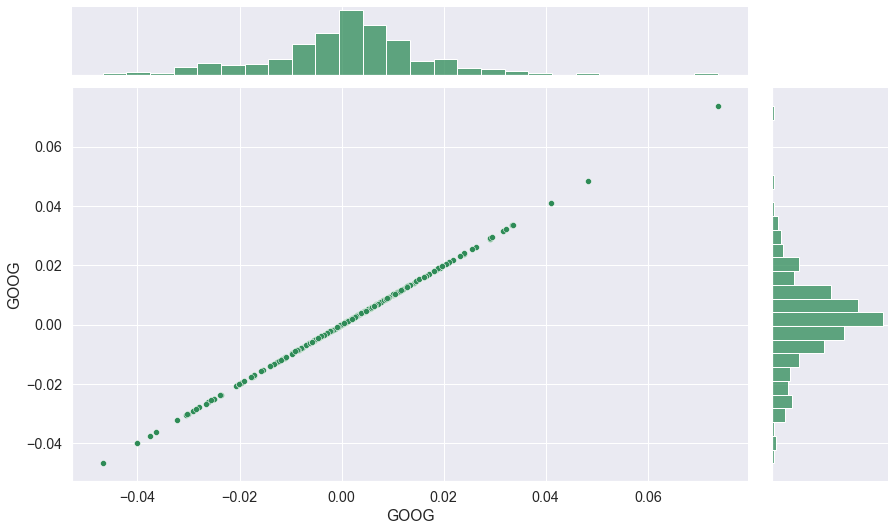

In [16]:
# Comparing Google to itself should show a perfectly linear relationship
sns.set(font_scale=1.3)
grid = sns.jointplot(x='GOOG', y='GOOG', data=stock_rst, kind='scatter', color='seagreen')
grid.fig.set_figwidth(14)
grid.fig.set_figheight(8)

# 4.2 Daily return of Google and Tesla

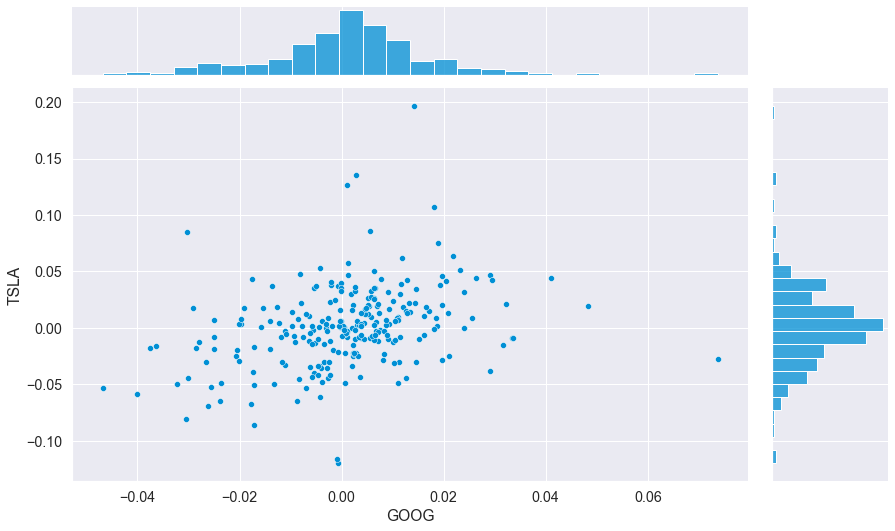

In [17]:
# We'll use joinplot to compare the daily returns of Google and Tesla

sns.set(font_scale=1.3)
grid = sns.jointplot(x='GOOG', y='TSLA', data=stock_rst, kind='scatter', color = '#008FD5')
grid.fig.set_figwidth(14)
grid.fig.set_figheight(8)

## 4.3 Correlations between stocks daily returns

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

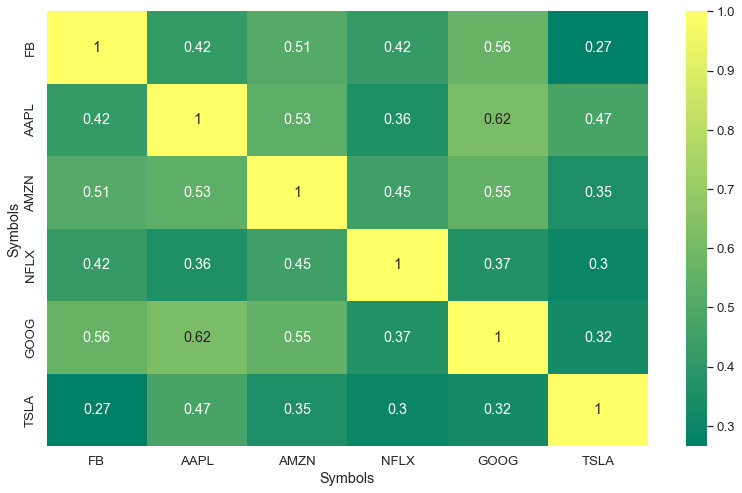

In [21]:
# correlation plot for the daily returns
sns.set(rc={'figure.figsize':(12, 8)}, font_scale=1.2)
sns.heatmap(stock_rst.corr(), annot=True, cmap = 'summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

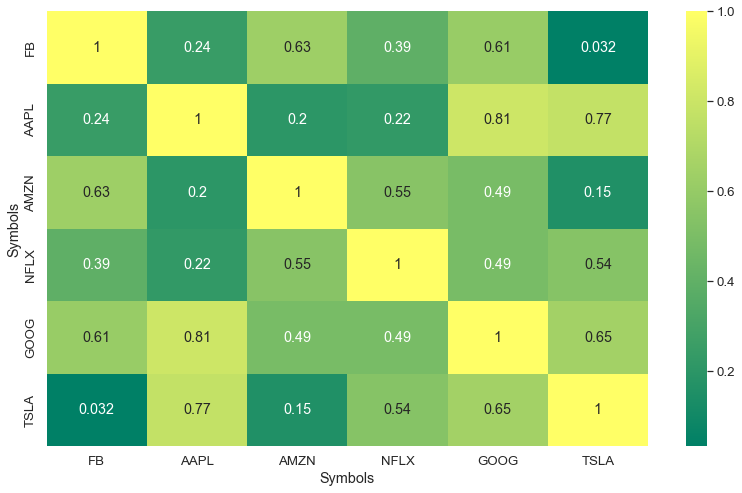

In [22]:
sns.set(rc={'figure.figsize':(12, 8)}, font_scale=1.2)
sns.heatmap(closing_price.corr(), annot=True, cmap = 'summer')

## 4.4 Correlation between stocks closing prices

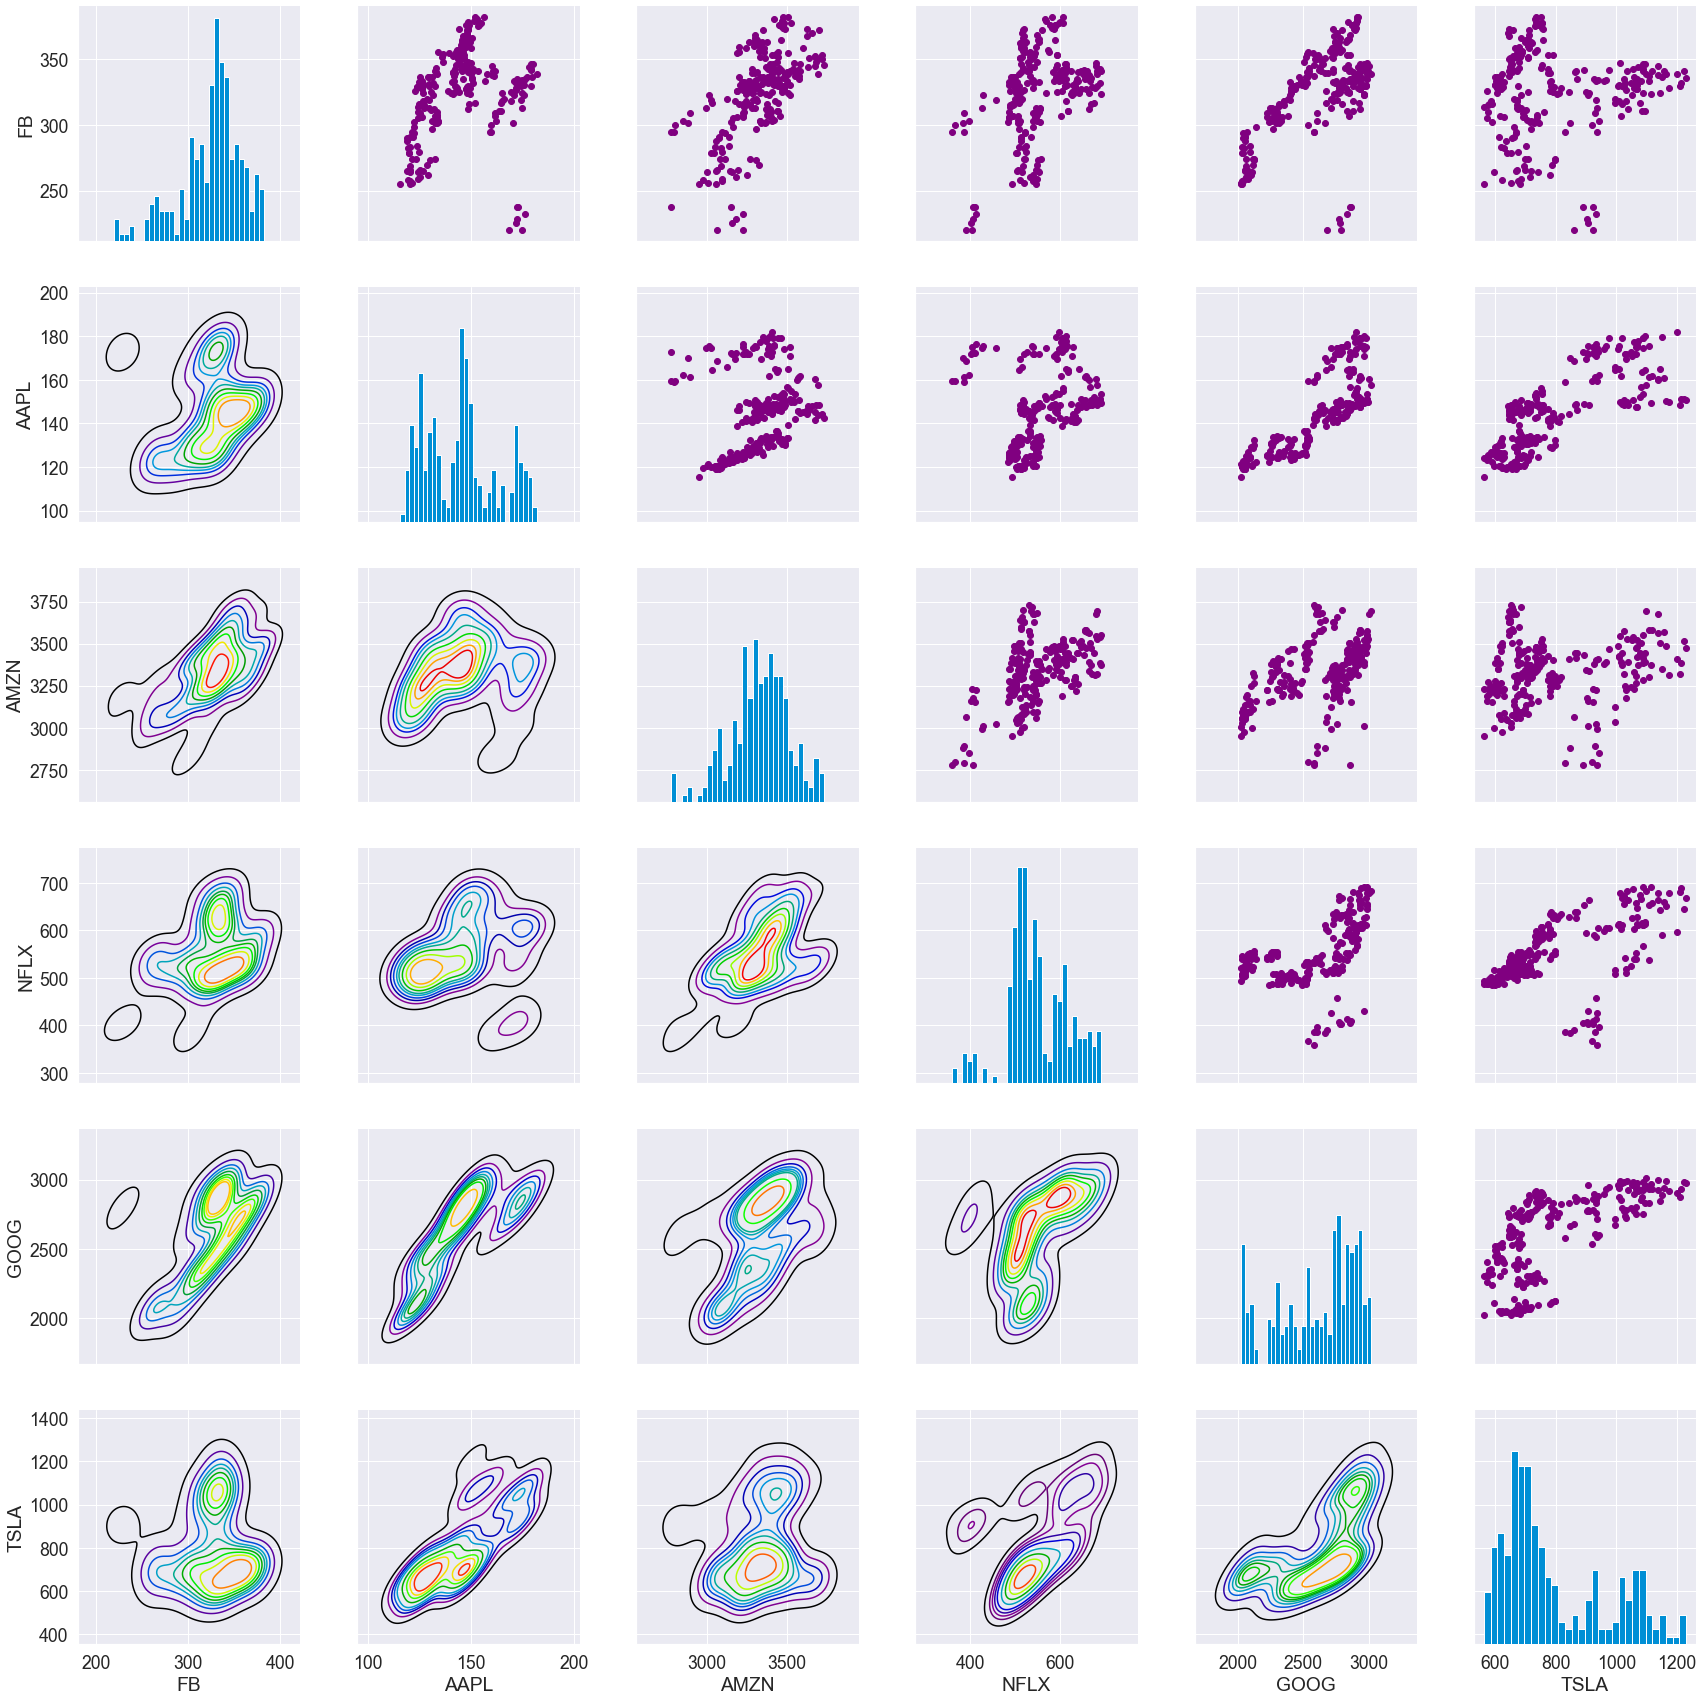

In [18]:
sns.set(font_scale=1.6)

return_fig = sns.PairGrid(closing_price)

return_fig.fig.set_size_inches(25, 25)

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_diag(plt.hist, bins=30, color= '#008FD5')

return_fig.map_lower(sns.kdeplot, cmap='nipy_spectral')

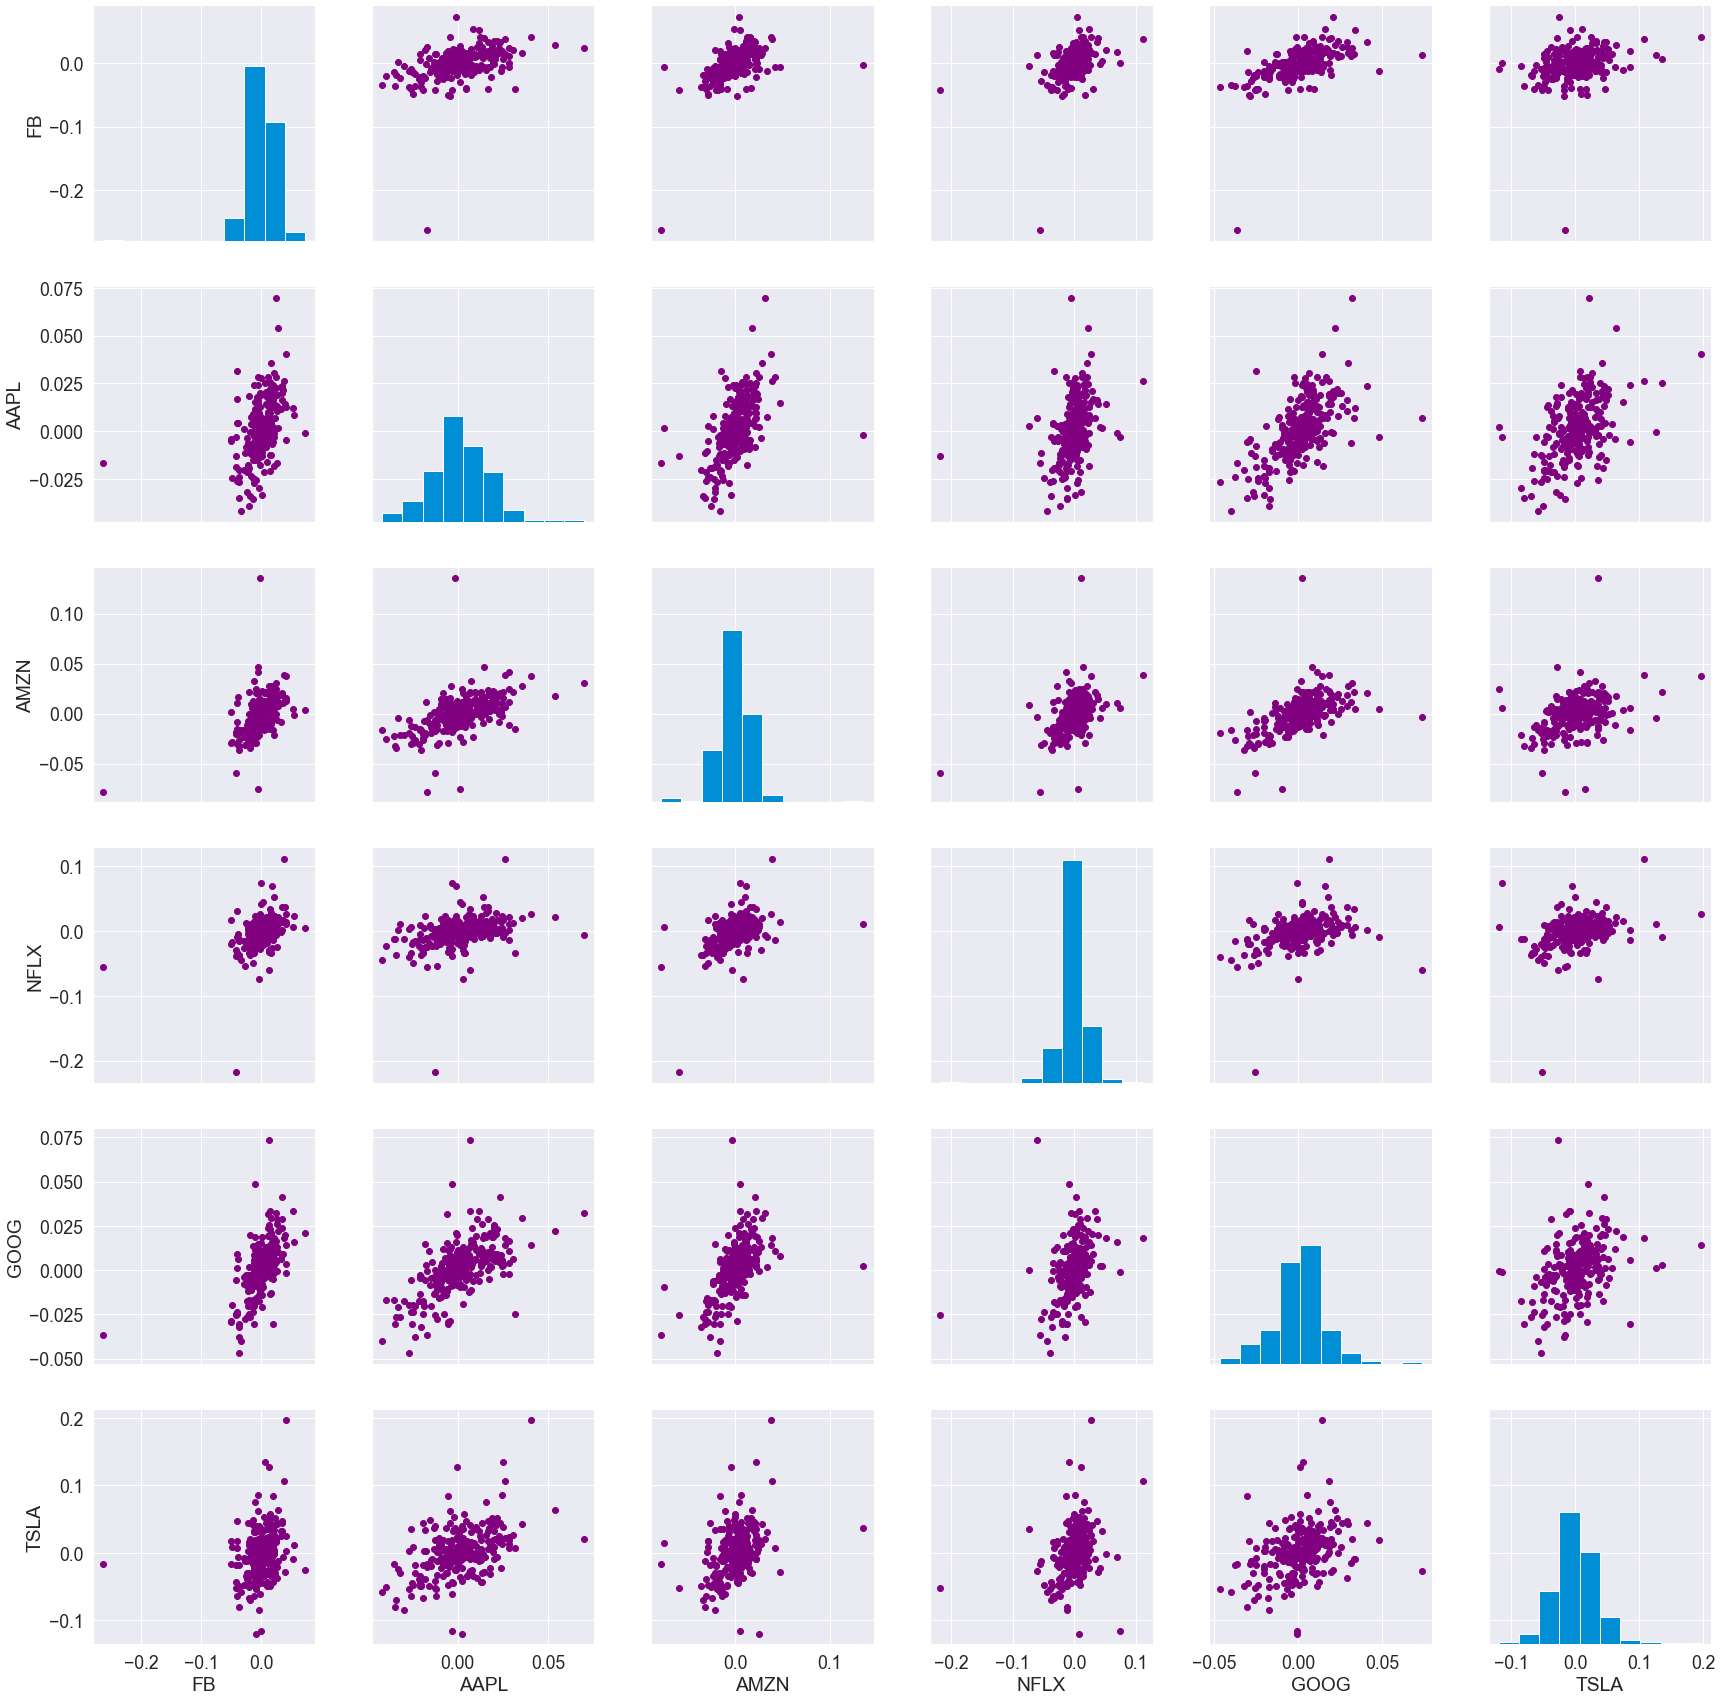

In [19]:
sns.set(font_scale=1.6)

fig_grid = sns.PairGrid(stock_rst.dropna())

fig_grid.fig.set_size_inches(25, 25)

fig_grid.map_upper(plt.scatter, color = 'purple')

fig_grid.map_diag(plt.hist, color='#008FD5')

fig_grid.map_lower(plt.scatter, color = 'purple')

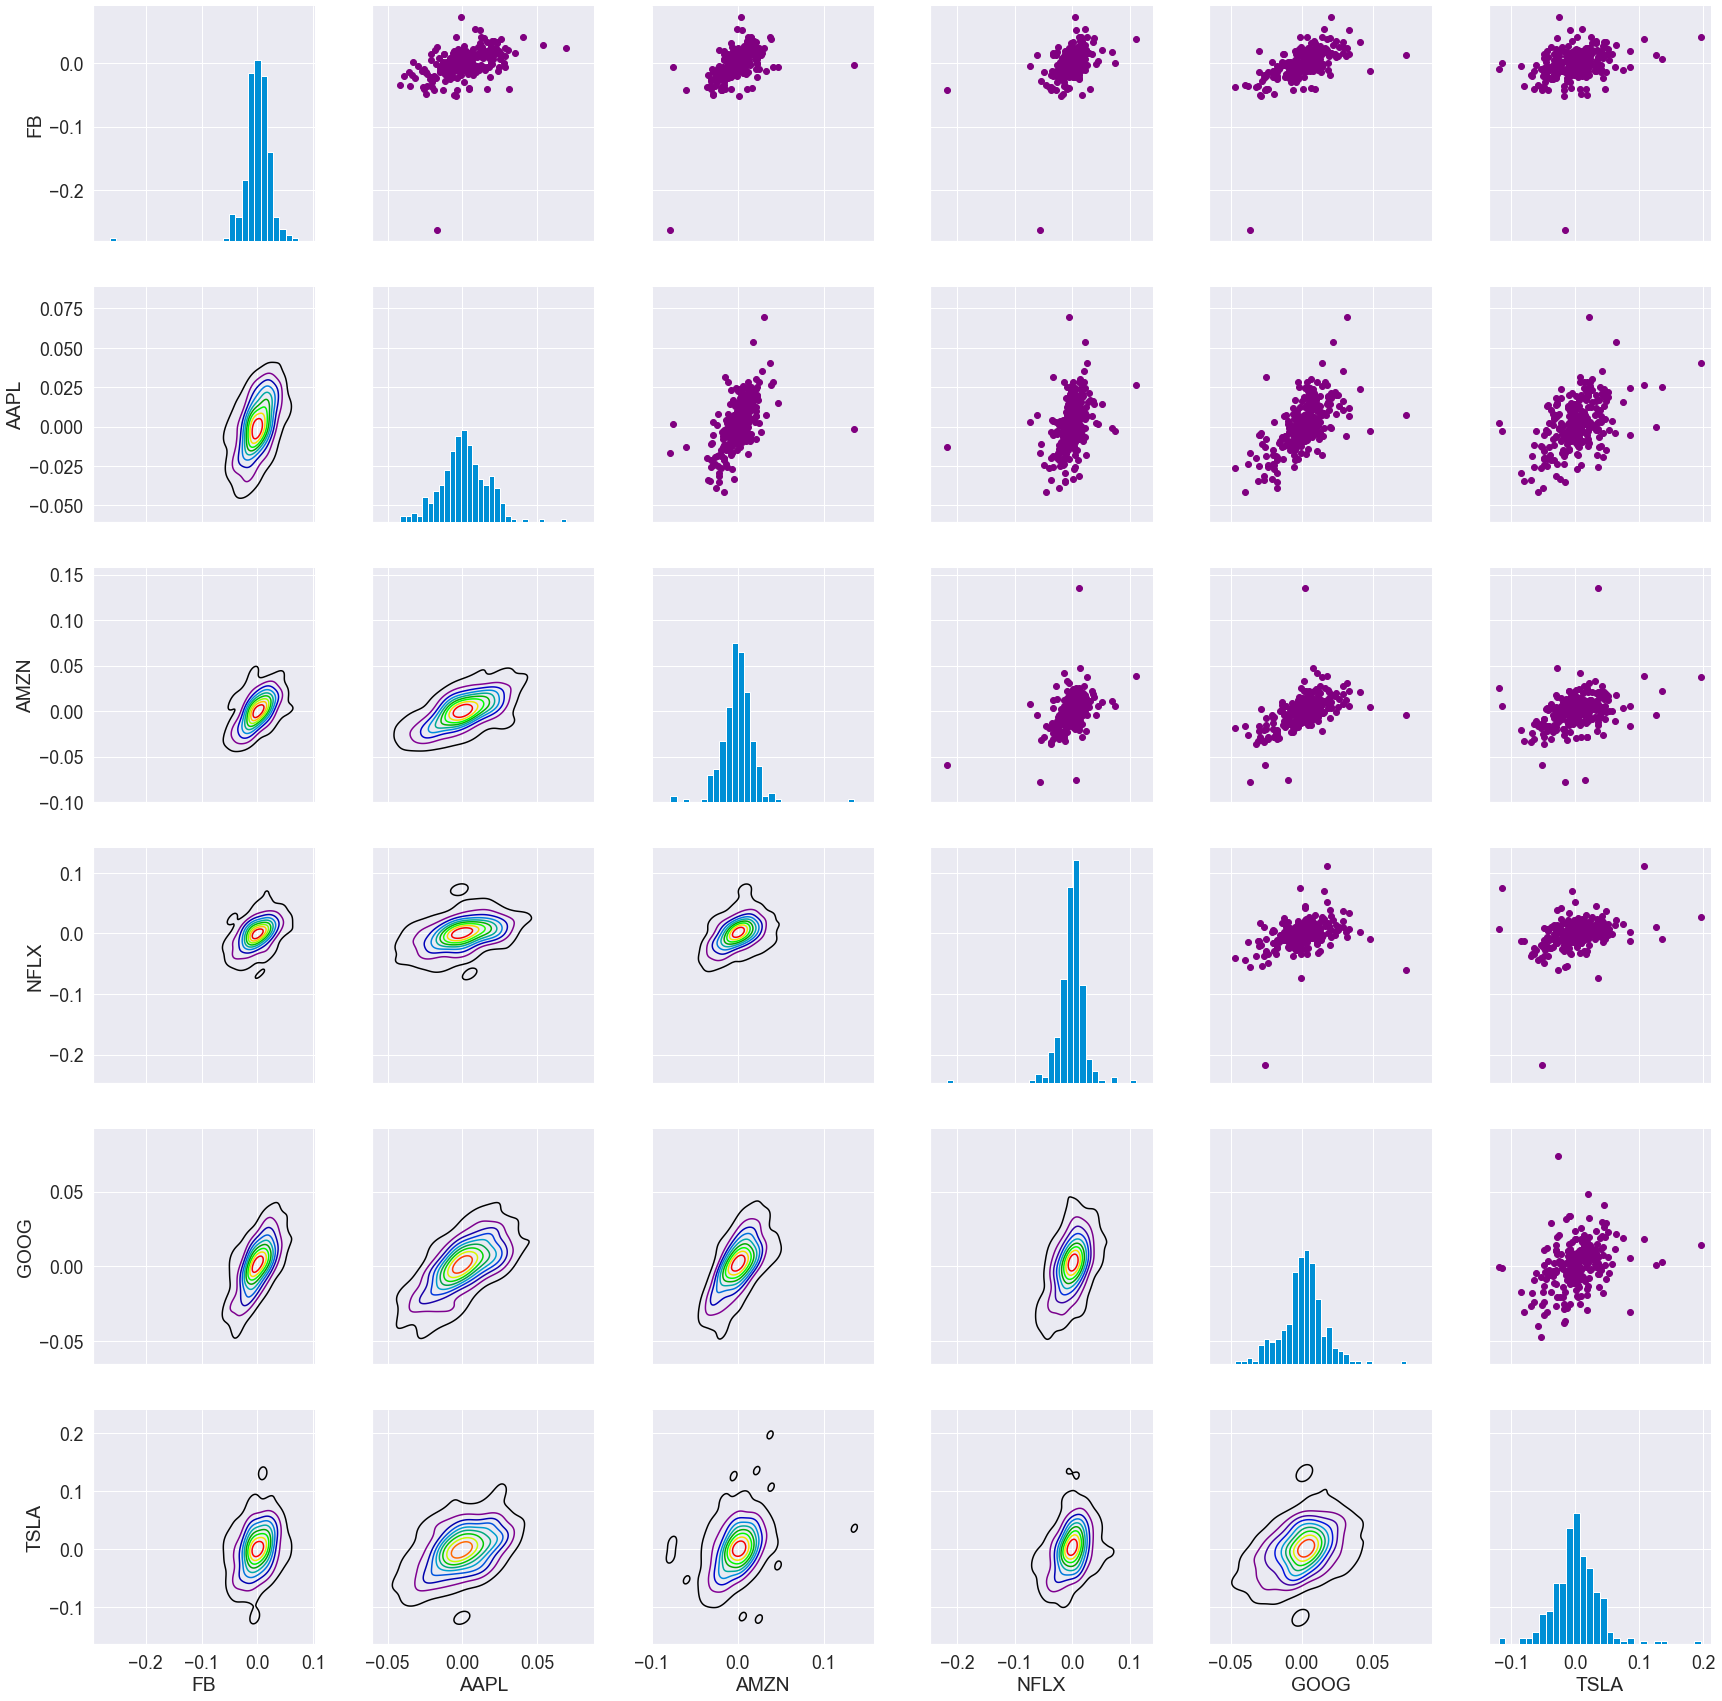

In [20]:
sns.set(font_scale=1.6)

return_fig_grid = sns.PairGrid(stock_rst.dropna())

return_fig_grid.fig.set_size_inches(25, 25)

return_fig_grid.map_upper(plt.scatter, color='purple')

return_fig_grid.map_diag(plt.hist, bins=30, color = '#008FD5')

return_fig_grid.map_lower(sns.kdeplot, cmap='nipy_spectral')

# 5. The risk of investing in a particular stock

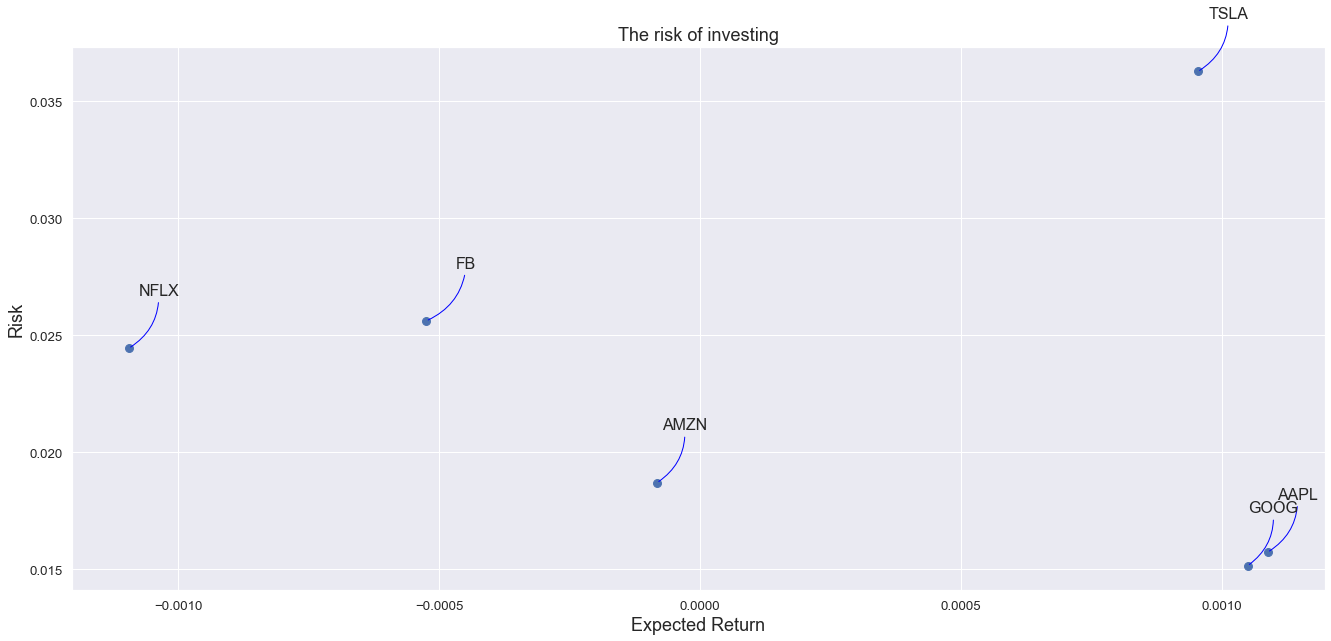

In [44]:
cleaned_rst = stock_rst.dropna()

area = np.pi * 20

plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 16})
plt.scatter(cleaned_rst.mean(), cleaned_rst.std(), s=area)
plt.title('The risk of investing', fontsize=18)
plt.xlabel('Expected Return', fontsize=18)
plt.ylabel('Risk', fontsize=18)

for label, x, y in zip(cleaned_rst.columns, cleaned_rst.mean(), cleaned_rst.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3, rad=-0.3'))
    

# 6. Predicting the closing price stock price of TESLA:

In [24]:
df = DataReader('TSLA', data_source='yahoo', start='2010-06-28', end=datetime.now())

df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-31,937.989990,862.049988,872.710022,936.719971,34812000.0,936.719971
2022-02-01,943.700012,905.000000,935.210022,931.250000,24379400.0,931.250000
2022-02-02,931.500000,889.409973,928.179993,905.659973,22264300.0,905.659973
2022-02-03,937.000000,880.520020,882.000000,891.140015,26285200.0,891.140015
2022-02-04,936.500000,881.169983,897.219971,923.320007,24472600.0,923.320007
2022-02-07,947.770020,902.710022,923.789978,907.340027,20331500.0,907.340027
2022-02-08,926.289978,894.799988,905.530029,922.000000,16909700.0,922.000000
2022-02-09,946.270020,920.000000,935.000000,932.000000,17419800.0,932.000000
2022-02-10,943.809998,896.700012,908.369995,904.549988,22042300.0,904.549988


In [25]:
len(df)

2928

In [26]:
df.iloc[:, [3]]

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-02-07,907.340027
2022-02-08,922.000000
2022-02-09,932.000000


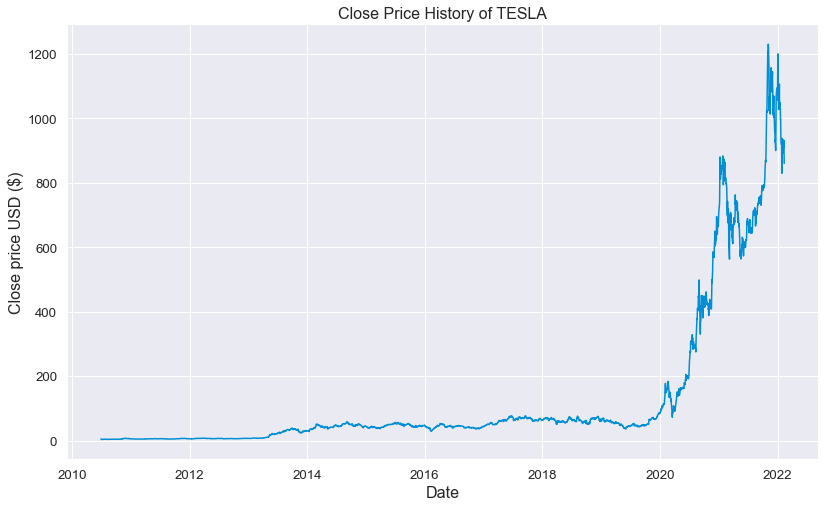

In [27]:
plt.figure(figsize=(12, 8))

plt.title('Close Price History of TESLA', fontsize=16)
plt.plot(df['Close'], color = '#008FD5')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close price USD ($)', fontsize=16)

plt.show()

## 6.1 Creating training dataset

In [28]:
data = df.filter(['Close'])
dataset = data.values

training_data_len = int(np.ceil(len(dataset) * 0.90))
training_data_len

2636

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.75715506],
       [0.73477886],
       [0.6984634 ]])

In [30]:
display(f'Scaled data original: {scaled_data.shape}', f'Training data len 90%: {training_data_len}' )

'Scaled data original: (2928, 1)'

'Training data len 90%: 2636'

In [31]:
# Create the scaled training data set
train_data = scaled_data[:training_data_len:, :] #2636 

x_train = []
y_train = []

for i in range(60, len(train_data)): #2636 - 60 = 2,576
    x_train.append(train_data[i-60:i]) #0 to 2,576
    y_train.append(train_data[i]) #60 to 2,576
    
print(len(x_train))
print(len(y_train))

#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

2576
2576


(2576, 60, 1)

## 6.2 Creating a Neural Network 

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))

model.add(LSTM(units = 50, return_sequences = True))

model.add(LSTM(50, return_sequences = True))

model.add(LSTM(50, return_sequences = False))

model.add(Dense(1))

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
model.fit(x_train, y_train, batch_size= 32, epochs = 15)

Epoch 1/15
81/81 [==============================] - 28s 64ms/step - loss: 5.5665e-04
Epoch 2/15
81/81 [==============================] - 5s 64ms/step - loss: 1.9755e-04
Epoch 3/15
81/81 [==============================] - 5s 62ms/step - loss: 1.8928e-04
Epoch 4/15
81/81 [==============================] - 5s 62ms/step - loss: 2.0498e-04
Epoch 5/15
81/81 [==============================] - 5s 63ms/step - loss: 1.7354e-04
Epoch 6/15
81/81 [==============================] - 5s 66ms/step - loss: 1.7704e-04
Epoch 7/15
81/81 [==============================] - 5s 63ms/step - loss: 1.0344e-04
Epoch 8/15
81/81 [==============================] - 5s 63ms/step - loss: 1.3398e-04
Epoch 9/15
81/81 [==============================] - 5s 63ms/step - loss: 1.0875e-04
Epoch 10/15
81/81 [==============================] - 5s 66ms/step - loss: 9.4602e-05
Epoch 11/15
81/81 [==============================] - 5s 63ms/step - loss: 8.3502e-05
Epoch 12/15
81/81 [==============================] - 5s 63ms/step - loss:

## 6.3 Creating the testing dataset

In [35]:
# Create the testing data set
test_data = scaled_data[training_data_len - 61:, :] #2635 - 60 = 2,575 - 2,928  = 353
print(len(test_data))

# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len - 1:, :] # 2635 - 2,928 = 293, 

for i in range(60, len(test_data)): # 353 - 60 = 293
    x_test.append(test_data[i-60:i, 0]) # 0 to 293
    
print(len(x_test))
print(len(y_test))

# Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# x_test.shape

353
293
293


## 6.4 Predictions of the prices values

In [36]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [37]:
# Get the root mean squared error (RMSE)
rsme = np.sqrt(np.mean((predictions - y_test) ** 2))
rsme

77.4288688873239

In [38]:
train = data[:training_data_len]
valid = data[training_data_len - 1:]


valid = valid.loc[df['Close' ] > 2]
valid['Predictions'] = predictions

valid

,Close,Predictions
Date,,
2020-12-15,633.250000,589.336182
2020-12-16,622.770020,588.109558
2020-12-17,655.900024,586.680420
2020-12-18,695.000000,587.253601
2020-12-21,649.859985,593.403076
...,...,...
2022-02-07,907.340027,833.055054
2022-02-08,922.000000,849.501709
2022-02-09,932.000000,863.908752


## 6.5 Plotting the model prevision

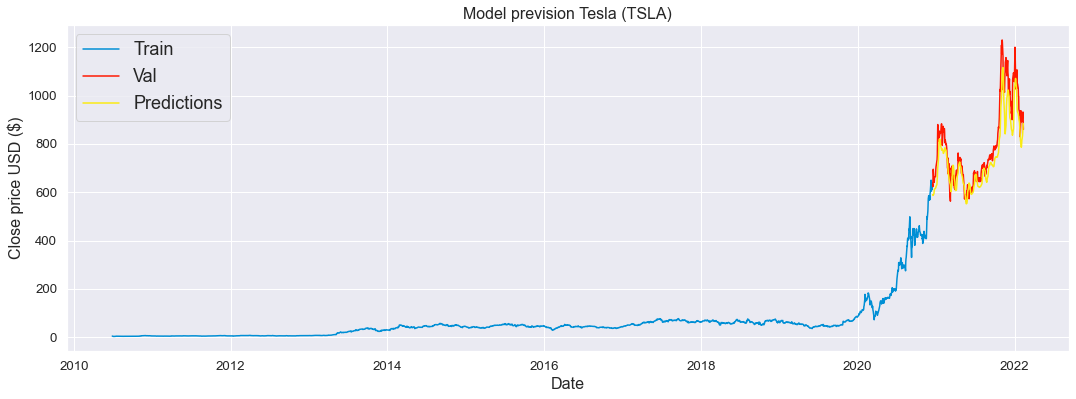

In [42]:
plt.figure(figsize=(16, 6))
plt.title('Model prevision Tesla (TSLA)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close price USD ($)', fontsize=16)
plt.plot(train['Close'], color = '#008FD5')
plt.plot(valid['Close'], color = '#FF1801')
plt.plot(valid['Predictions'], color ='#FAEB13')
plt.legend(['Train', 'Val', 'Predictions'], fontsize=18, loc='upper left')

plt.show()

# 7. Conclusion

### **This project was a analysis of the stocks: Facebook, Apple, Amazon, Netflix, Google and Tesla, with purpose of understand the relations between the FAANG companies, and if the influence of FAANG have a directly effect on Tesla stocks.**